In [1]:
import pandas as pd

gas = pd.read_csv('gas.csv', index_col=False)
rad = pd.read_csv('rad.csv', index_col=False)
slv = pd.read_csv('slv.csv', index_col=False)
temp = pd.read_csv('temp.csv', index_col=False)

In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          348 non-null    int64  
 1   Day                                 348 non-null    object 
 2   Avg Min Temperature (°C)            348 non-null    float64
 3   Avg Max Temperature (°C)            348 non-null    float64
 4   Radiation amount (kWh/m²/day)       348 non-null    float64
 5   gas_emission (billion metric tons)  348 non-null    float64
 6   Sea level (mm)                      348 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.2+ KB


In [6]:
import numpy as np

# Create a list to hold monthly interpolated values
monthly_radiation = []

# Loop through each year (except last) to interpolate to the next
for i in range(len(rad) - 1):
    start_val = rad.iloc[i]['Radiation amount (kWh/m²/day)']
    end_val = rad.iloc[i + 1]['Radiation amount (kWh/m²/day)']
    
    # Generate 12 evenly spaced values from start to just before end
    interpolated = np.linspace(start_val, end_val, 12, endpoint=False)
    monthly_radiation.extend(interpolated)

# For the last year (2017), repeat its value 12 times
last_val = rad.iloc[-1]['Radiation amount (kWh/m²/day)']
monthly_radiation.extend([last_val] * 12)

# Add the interpolated values to temp_avg
temp['Radiation amount (kWh/m²/day)'] = monthly_radiation


In [9]:
monthly_gas = []

for i in range(len(gas) - 1):
    start = gas.iloc[i]['gas_emission (billion metric tons)']
    end = gas.iloc[i + 1]['gas_emission (billion metric tons)']
    monthly = np.linspace(start, end, 12, endpoint=False)
    monthly_gas.extend(monthly)

# Final year (2017)
monthly_gas.extend([gas.iloc[-1]['gas_emission (billion metric tons)']] * 12)

temp['gas_emission (billion metric tons)'] = monthly_gas

In [12]:
monthly_sea = []

for i in range(len(slv) - 1):
    start = slv.iloc[i]['Sea level (mm)']
    end = slv.iloc[i + 1]['Sea level (mm)']
    monthly = np.linspace(start, end, 12, endpoint=False)
    monthly_sea.extend(monthly)

monthly_sea.extend([slv.iloc[-1]['Sea level (mm)']] * 12)

temp['Sea level (mm)'] = monthly_sea


In [16]:
temp = temp.drop(columns=['Unnamed: 0'])

In [19]:
master = temp.copy()

In [20]:
master

,Day,Avg Min Temperature (°C),Avg Max Temperature (°C),Radiation amount (kWh/m²/day),gas_emission (billion metric tons),Sea level (mm)
0,1989-01-15,13.217825,18.101305,9.166878,8.700000,-25.147396
1,1989-02-15,14.283951,18.101305,9.364203,8.716667,-24.955729
2,1989-03-15,16.452374,18.101305,9.561528,8.733333,-24.764062
3,1989-04-15,18.427382,18.101305,9.758853,8.750000,-24.572396
4,1989-05-15,20.127930,18.101305,9.956178,8.766667,-24.380729
...,...,...,...,...,...,...
343,2017-08-15,22.964857,18.924207,11.716911,17.300000,57.355991
344,2017-09-15,21.554958,18.924207,11.716911,17.300000,57.355991
345,2017-10-15,19.490632,18.924207,11.716911,17.300000,57.355991
346,2017-11-15,16.691151,18.924207,11.716911,17.300000,57.355991


In [21]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Day                                 348 non-null    object 
 1   Avg Min Temperature (°C)            348 non-null    float64
 2   Avg Max Temperature (°C)            348 non-null    float64
 3   Radiation amount (kWh/m²/day)       348 non-null    float64
 4   gas_emission (billion metric tons)  348 non-null    float64
 5   Sea level (mm)                      348 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.4+ KB


In [24]:
master['Day'] = pd.to_datetime(master['Day'])
master['Year'] = master['Day'].dt.year
master['Month'] = master['Day'].dt.month

In [27]:
 master = master.drop(columns=['Avg Max Temperature (°C)'])

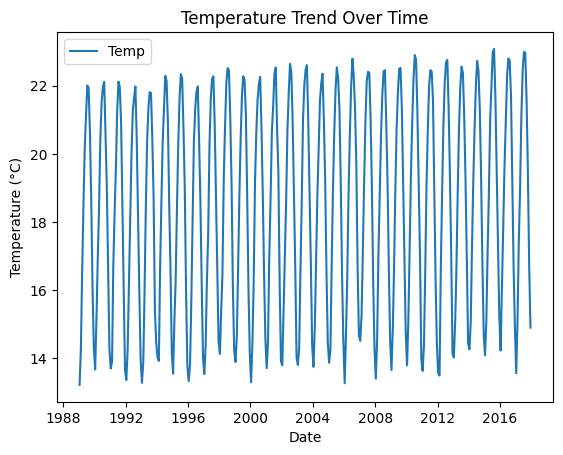

In [29]:
import matplotlib.pyplot as plt
plt.plot(master['Day'], master['Avg Min Temperature (°C)'], label='Temp')
plt.legend()
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

C:\Users\Ab Deshmukh\AppData\Local\Temp\ipykernel_5920\3109045362.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


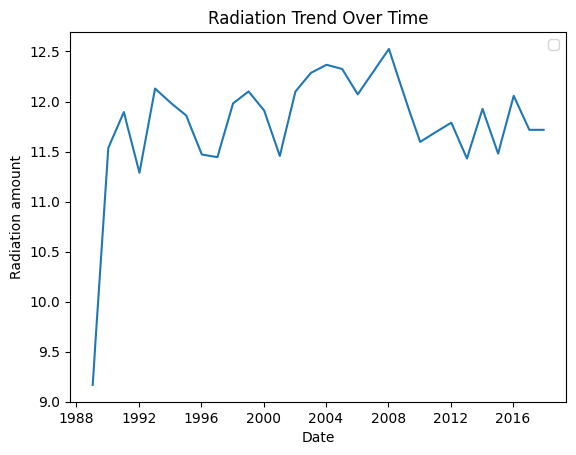

In [30]:
plt.plot(master['Day'], master['Radiation amount (kWh/m²/day)'])
plt.legend()
plt.title("Radiation Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Radiation amount")
plt.show()

C:\Users\Ab Deshmukh\AppData\Local\Temp\ipykernel_5920\1895562147.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


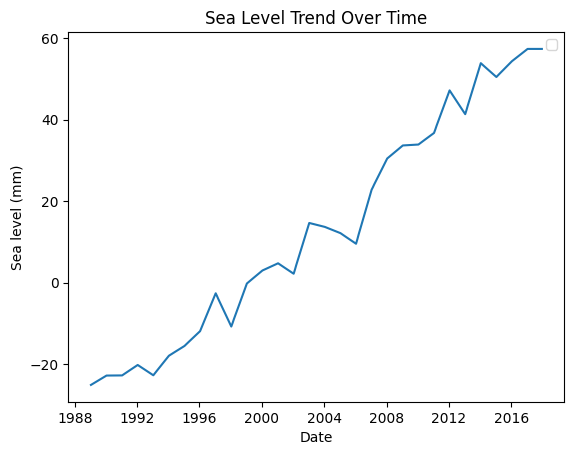

In [31]:
plt.plot(master['Day'], master['Sea level (mm)'])
plt.legend()
plt.title("Sea Level Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sea level (mm)")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

# Step 1: Split 30 rows for final test set
final_test = master.tail(30).reset_index(drop=True)
train_val = master.iloc[:-30].reset_index(drop=True)

# Step 2: Chronological train-validation split (e.g., 80-20)
train_size = int(len(train_val) * 0.8)
train = train_val.iloc[:train_size]
val = train_val.iloc[train_size:]


In [33]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Day                                 348 non-null    datetime64[ns]
 1   Avg Min Temperature (°C)            348 non-null    float64       
 2   Radiation amount (kWh/m²/day)       348 non-null    float64       
 3   gas_emission (billion metric tons)  348 non-null    float64       
 4   Sea level (mm)                      348 non-null    float64       
 5   Year                                348 non-null    int32         
 6   Month                               348 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 16.4 KB


In [44]:
# Features: all except Day and target
feature_cols = ['Radiation amount (kWh/m²/day)', 'gas_emission (billion metric tons)', 'Avg Min Temperature (°C)']
target_col = 'Sea level (mm)'

X_train = train[feature_cols]
y_train = train[target_col]

X_val = val[feature_cols]
y_val = val[target_col]


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print("MSE:", mean_squared_error(y_val, y_pred))
print("R² Score:", r2_score(y_val, y_pred))

MSE: 7.873191786982922
R² Score: 0.7818823756287316


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Degree of the polynomial (start with 2 or 3)
degree = 2

# Create pipeline: Polynomial Transformation + Linear Regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit on training data
poly_model.fit(X_train, y_train)

# Predict
y_pred = poly_model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 4.967501252488738
R² Score: 0.862381153467449


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

print("MSE:", mean_squared_error(y_val, y_pred_rf))
print("R² Score:", r2_score(y_val, y_pred_rf))

MSE: 159.91213810944407
R² Score: -3.4301798579618117


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', LinearRegression())
])

# Define parameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'poly__interaction_only': [False],
    'poly__include_bias': [False],
    'linreg__fit_intercept': [True, False]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("🔍 Best Params:", grid.best_params_)
print("📉 MSE:", mse)
print("📈 R² Score:", r2)


🔍 Best Params: {'linreg__fit_intercept': True, 'poly__degree': 1, 'poly__include_bias': False, 'poly__interaction_only': False}
📉 MSE: 7.873191786982938
📈 R² Score: 0.7818823756287312


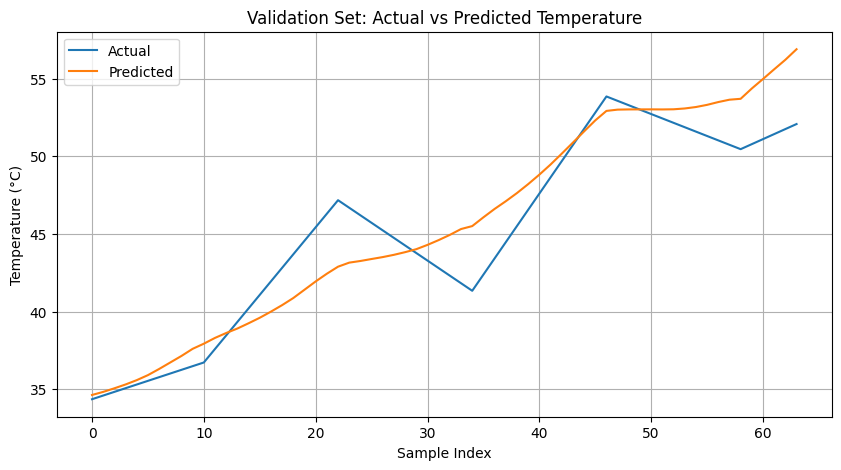

In [49]:
# lets test it on test set.
import matplotlib.pyplot as plt

# Predict on train and validation sets
y_train_pred = poly_model.predict(X_train)
y_val_pred = poly_model.predict(X_val)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_val.values, label="Actual")
plt.plot(y_val_pred, label="Predicted")
plt.title("Validation Set: Actual vs Predicted Temperature")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''The exploratory data analysis revealed clear trends: CO2 emissions showed a steady increase over the years, radiation values fluctuated slightly but generally increased, and sea levels demonstrated a gradual upward trend, indicating potential climate-related impacts.
Temperature values varied seasonally as expected but provided important contextual information related to radiation and emissions.
We also examined correlations between variables, observing that sea level showed meaningful associations with both CO2 emissions and radiation levels, which supported our hypothesis that these factors influence sea level rise.'''